In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

## Import Panda Dataframes from csv-Files (Excel Sheets)

In [13]:
path1 = 'database1.csv'
path2 = 'database2.csv'
path3 = 'database3.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

# Replace NaN in cells with emptry string in all dataframes
# df1.fillna('', inplace=True)
# df2.fillna('', inplace=True)
# df3.fillna('', inplace=True)


## Check Dataframe Headers to verify correct csv-Files and import to Dataframe

In [14]:
# To show all columns
pd.set_option('display.max_columns', None)

print("DataFrame from database1.csv:\n")
print(df1.head(10))

print("\nDataFrame from database2.csv:\n")
print(df2.head(10))

print("\nDataFrame from database3.csv:\n")
print(df3.head(10))


DataFrame from database1.csv:

                                 BETRIEB_NAME      BETRIEB_STRASSE  \
0                            technocycle GmbH     Industriestrasse   
1                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
2         Lars Walch GmbH & Co. GmbH & Co. KG    Raiffeisenstraße    
3                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
4                    Lars Walch GmbH & Co. KG    Raiffeisenstraße    
5          FSD Lwerk Berlin Brandenburg gGmbH       Kamenzer Damm    
6  HKV Elektroschrott Recycling GmbH & Co. KG        Gutenbergstr.   
7                     Hausgeräte Lagerverkauf         Wenger Höfe    
8            BRAL Reststoff-Bearbeitungs GmbH    Marzahner Straße    
9          Weinand Recyclingges. mbH & Co. KG  Schwabenheimer Weg    

  BETRIEB_HAUSNR BETRIEB_PLZ    BETRIEB_ORT   BETRIEB_BUNDESLAND  \
0             60       49565       Bramsche        Niedersachsen   
1             24       91460     Baudenbach               Baye

                                 BETRIEB_NAME      BETRIEB_STRASSE  \
0                            technocycle GmbH     Industriestrasse   
1                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
2         Lars Walch GmbH & Co. GmbH & Co. KG    Raiffeisenstraße    
3                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
4                    Lars Walch GmbH & Co. KG    Raiffeisenstraße    
5          FSD Lwerk Berlin Brandenburg gGmbH       Kamenzer Damm    
6  HKV Elektroschrott Recycling GmbH & Co. KG        Gutenbergstr.   
7                     Hausgeräte Lagerverkauf         Wenger Höfe    
8            BRAL Reststoff-Bearbeitungs GmbH    Marzahner Straße    
9          Weinand Recyclingges. mbH & Co. KG  Schwabenheimer Weg    

  BETRIEB_HAUSNR BETRIEB_PLZ    BETRIEB_ORT   BETRIEB_BUNDESLAND  \
0             60       49565       Bramsche        Niedersachsen   
1             24       91460     Baudenbach               Bayern   
2             24       91

In [15]:
#categories = ["KG1_INPUT", "KG2_INPUT", "KG3_INPUT", 
 #            "KG4_INPUT", "KG5_INPUT", "KG6_INPUT"]
#for category in categories: 
category = "KG6_INPUT"    
relevant_columns = ["BETRIEB_NAME","BETRIEBSZERTIFIZIERUNG",category, "BETRIEB_STRASSE", "BETRIEB_HAUSNR", "BETRIEB_PLZ", "BETRIEB_ORT", "BETRIEB_BUNDESLAND"]
catx_df = df1[relevant_columns]
catx_df = catx_df.dropna(subset=['BETRIEBSZERTIFIZIERUNG'])
catx_df = catx_df.dropna(subset=[category])


aggregations = {
    category : 'sum',  
    'BETRIEB_STRASSE': 'first',   
    'BETRIEB_HAUSNR': 'first',  
    'BETRIEB_PLZ': 'first', 
    'BETRIEB_ORT': 'first', 
    'BETRIEB_BUNDESLAND': 'first'
}


summed_df = catx_df.groupby(['BETRIEB_NAME']).agg(aggregations).reset_index()
sorted_df = summed_df.sort_values(by=category, ascending=False)
total_kg1_input = sorted_df[category].sum()
sorted_df['Cumulative_Sum'] = sorted_df[category].cumsum()
sorted_df['Cumulative_Percentage'] = (sorted_df['Cumulative_Sum'] / total_kg1_input) * 100
sorted_df = sorted_df.reset_index()
selected_df = sorted_df[sorted_df['Cumulative_Percentage'] <= 80]
selected_companies = selected_df['BETRIEB_NAME']

# Number of the first n companies that make up more than 80 percent of total input for Kategorie 1 (CAUTION: starting from 0, so the actual number is index + 1)
index_80_percent = (sorted_df['Cumulative_Percentage'] > 80).idxmax()

# Get the exac percentage the first n companies make up over 80%
cumulative_percentage_value = sorted_df.loc[index_80_percent, 'Cumulative_Percentage']

relevant_companies = sorted_df.loc[:index_80_percent, 'BETRIEB_NAME'].tolist()

company_data_dict = {}

# 'BETRIEB_NAME', "BETRIEB_STRASSE", "BETRIEB_PLZ", "BETRIEB_ORT", "BETRIEB_BUNDESLAND"
for index, row in sorted_df.iterrows():
    share = row[category]/total_kg1_input
    company_name = row['BETRIEB_NAME']
    strasse = row['BETRIEB_STRASSE']
    nummer = row['BETRIEB_HAUSNR']
    PLZ = row['BETRIEB_PLZ']
    ort = row["BETRIEB_ORT"]
    bundesland = row["BETRIEB_BUNDESLAND"]
    
    if company_name in relevant_companies: 
      
        company_data_dict[company_name] = {
            'share': float("{:.2f}".format(share * 100)),
            'strasse': strasse + " " + nummer,
            'Ort': PLZ + " " + ort, 
            "bundesland":bundesland
        }

number_relvant_companies = sorted_df.shape[0]


catx_input_index_0 = sorted_df.at[0, category]
catx_input_index_1 = sorted_df.at[1, category]


## Show Kategorie x Input for companies graphically 

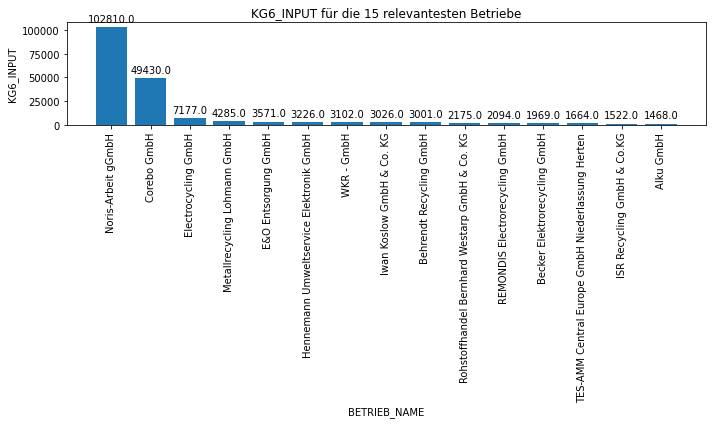


Total KG6_INPUT: 212540.0

The first 6 companies out of 135 companies make up 80.22% of the total KG6_INPUT

The Input of the most relevant company is 2.0799109852316406 of the second most relevant company


In [16]:
plt.figure(figsize=(10, 6))
# plt.bar(sorted_df['BETRIEB_NAME'], sorted_df['KG1_INPUT'])
bars = plt.bar(sorted_df['BETRIEB_NAME'][:15], sorted_df[category][:15])
plt.xlabel('BETRIEB_NAME')
plt.ylabel(category)
plt.title('{} für die 15 relevantesten Betriebe'.format(category))
plt.xticks(rotation=90)
plt.tight_layout()





for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
        
plt.tight_layout()
plt.show()


print("\nTotal {}: {}".format(category, total_kg1_input))
print("\nThe first {} companies out of {} companies make up {}% of the total {}".format(index_80_percent + 1, number_relvant_companies,"{:.2f}".format(cumulative_percentage_value), category))
print("\nThe Input of the most relevant company is {} of the second most relevant company".format(catx_input_index_0/catx_input_index_1))

## Relevant Companies and their addresses for the respective Input Categories

In [17]:
sorted_dict = sorted(company_data_dict.items(), key=lambda item: item[1]['share'], reverse=True)

print(str(sorted_dict))

[('Noris-Arbeit gGmbH', {'share': 48.37, 'strasse': 'Gutenstetter Str. 20', 'Ort': '90449 Nürnberg', 'bundesland': 'Bayern'}), ('Corebo GmbH', {'share': 23.26, 'strasse': 'Dieselstrasse  22', 'Ort': '44805 Bochum', 'bundesland': 'Nordrhein-Westfalen'}), ('Electrocycling GmbH', {'share': 3.38, 'strasse': 'Landstraße  91', 'Ort': '38644 Goslar', 'bundesland': 'Niedersachsen'}), ('Metallrecycling Lohmann GmbH', {'share': 2.02, 'strasse': 'Gutenbergstraße 7', 'Ort': '48282 Emsdetten', 'bundesland': 'Nordrhein-Westfalen'}), ('E&O Entsorgung GmbH', {'share': 1.68, 'strasse': 'Am Ockenheimer Graben 24', 'Ort': '55411 Bingen', 'bundesland': 'Rheinland-Pfalz'}), ('Hennemann Umweltservice Elektronik GmbH', {'share': 1.52, 'strasse': 'Eugen-Gerstenmaier-Str.  11', 'Ort': '32339 Espelkamp', 'bundesland': 'Nordrhein-Westfalen'})]
